In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fs = 200.0 #sample rate, Hz


In [3]:
from IPython.html.widgets import interact, fixed

/home/gjones/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [63]:
def plot_nonlinear(a1=0,fs=200.0,ns=8192,f0=200/256.0,beta=1.,noise=0.):
    t = np.arange(ns)/fs
    phi = 2*np.pi*f0*t
    x = a1*np.sin(phi) + np.sin(4*phi)
    x = x/np.abs(x).max()
    y = np.tanh(beta*x)/beta + noise*np.random.randn(ns)
    fig,axs = subplots(3,2,figsize=(12,8))
    axs[0,0].plot(t,x)
    axs[0,0].set_xlim(0,10)
    axs[0,0].set_xlabel('Time (s)')
    axs[1,0].plot(t,y)
    axs[1,0].set_xlim(0,10)
    axs[1,0].set_xlabel('Time (s)')
    pxx,fr = mlab.psd(x,NFFT=ns,Fs=fs)
    pyy,fr = mlab.psd(y,NFFT=ns,Fs=fs)
    axs[0,1].loglog(fr,pxx)
    axs[0,1].set_xlabel('Hz')
    axs[1,1].loglog(fr,pyy)
    axs[1,1].set_xlabel('Hz')
    axs[2,0].plot(np.fmod(phi,np.pi*2),x,'.')
    axs[2,0].plot(np.fmod(phi,np.pi*2),y,'.')
    axs[2,0].set_xlabel('Phase')
    axs[2,1].plot(x,y-x,',')
    axs[2,1].set_xlabel('Input')
    axs[2,1].set_ylabel('Output-Input')
    axs[2,1].plot(np.linspace(-1,1,100),np.tanh(beta*np.linspace(-1,1,100))/beta-np.linspace(-1,1,100),'k--',lw=2)
#    axs[2,1].plot(np.linspace(-2,2,10),np.linspace(-2,2,10),'k--')
    

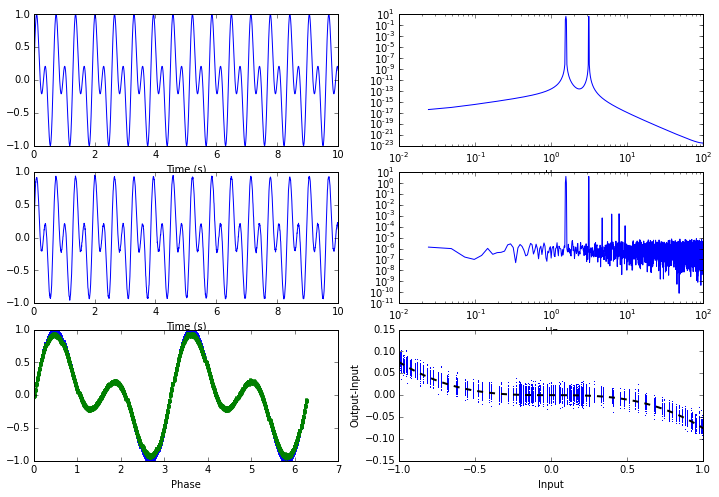

In [64]:
plot_nonlinear(a1=1.,beta=.5,noise=1e-2)

None

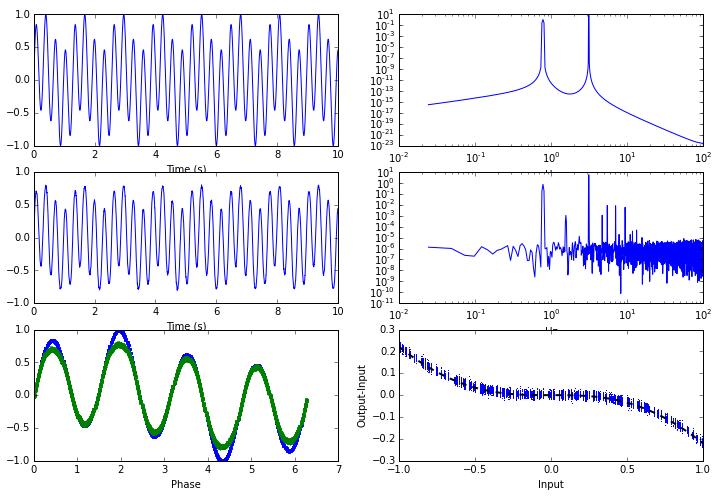

In [60]:
interact(plot_nonlinear,a1=(0,1.),beta=(1e-6,1.,1e-2),fs=fixed(200.),ns=fixed(8192),f0=fixed(200/256.),noise=(0.01,.2,1e-2))

In [59]:
np.sqrt(.15)

0.3872983346207417